# 커피 지수
### - (스타벅스 + 커피빈) / (이디야 + 빽다방)
### - 2020년 9월 데이터 (공공데이터포털/소상공인시장진흥공단_상가(상권)정보)
### - Cartogram 그리는 부분을 패키지로 만들어서 활용
drawKorea.py mapUtil.py

In [1]:
import numpy as np 
import pandas as pd 

## 데이터 가져오기

In [2]:
starbucks = pd.read_csv('./results/스타벅스.csv')
coffeebean = pd.read_csv('./results/커피빈.csv')
ediya = pd.read_csv('./results/이디야.csv')
paik = pd.read_csv('./results/빽다방.csv')

In [34]:
starbucks[starbucks['시군구'] == '마산합포구']

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,스타벅스 매장수
422,스타벅스,경남대점,경상남도 창원시 마산합포구 월영남로 3,128.558651,35.178454,경상남도,마산합포구,창원 합포,스타벅스,1
426,스타벅스,신세계마산점,경상남도 창원시 마산합포구 합포로 251,128.586614,35.219598,경상남도,마산합포구,창원 합포,스타벅스,1
446,스타벅스,마산해안대로DT점,경상남도 창원시 마산합포구 해안대로 377,128.580583,35.204212,경상남도,마산합포구,창원 합포,스타벅스,1


## 도로명주소에서 광역시도와 시군구/행정구명 찾기

In [3]:
import cartogram.mapUtil as mu

starbucks = mu.split_addr(starbucks)
coffeebean = mu.split_addr(coffeebean)
ediya = mu.split_addr(ediya)
paik = mu.split_addr(paik)

In [4]:
starbucks.reset_index(inplace=True)
starbucks.drop('index', axis=1, inplace=True)#뭘드롭한건가...?
starbucks['ID'] = mu.get_ID(starbucks)
starbucks['브랜드명'] = '스타벅스'
starbucks['스타벅스 매장수'] = 1
starbucks.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,스타벅스 매장수
0,스타벅스,NaN,강원도 원주시 금불1길 28-5,127.931032,37.348466,강원도,원주시,원주,스타벅스,1
1,스타벅스,오션월드2호점,강원도 홍천군 서면 한치골길 262,127.687273,37.652324,강원도,홍천군,홍천,스타벅스,1
2,스타벅스,대명델피노리조트점,강원도 고성군 토성면 미시령옛길 1153,128.493408,38.213128,강원도,고성군,고성(강원),스타벅스,1
3,스타벅스,강대점,강원도 춘천시 서부대성로 243-1,127.745087,37.872760,강원도,춘천시,춘천,스타벅스,1
4,스타벅스,속초중앙로점,강원도 속초시 중앙로 123,128.589463,38.202621,강원도,속초시,속초,스타벅스,1


In [5]:
coffeebean.reset_index(inplace=True)
coffeebean.drop('index', axis=1, inplace=True)
coffeebean['ID'] = mu.get_ID(coffeebean)
coffeebean['브랜드명'] = '커피빈'
coffeebean['커피빈 매장수'] = 1
coffeebean.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,커피빈 매장수
0,커피빈,NaN,강원도 동해시 일출로 107,129.118963,37.552715,강원도,동해시,동해,커피빈,1
1,커피빈,코리아원주AK플라자점,강원도 원주시 봉화로 1,127.927626,37.345679,강원도,원주시,원주,커피빈,1
2,커피빈,곰씨네,강원도 춘천시 동내면 춘천순환로 61-15,127.751359,37.856311,강원도,춘천시,춘천,커피빈,1
3,커피빈,NaN,경기도 이천시 남천로 93,127.447687,37.276730,경기도,이천시,이천,커피빈,1
4,커피빈,코리아수원인계점,경기도 수원시 팔달구 권광로 195,127.032669,37.264938,경기도,팔달구,수원 팔달,커피빈,1


In [6]:
ediya.reset_index(inplace=True)
ediya.drop('index', axis=1, inplace=True)
ediya['ID'] = mu.get_ID(ediya)
ediya['브랜드명'] = '이디야'
ediya['이디야 매장수'] = 1
ediya.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,이디야 매장수
0,이디야커피,우두동점,강원도 춘천시 충열로 39,127.732714,37.899493,강원도,춘천시,춘천,이디야,1
1,이디야커피,철원와수점,강원도 철원군 서면 와수로181번길 25-21,127.438109,38.239147,강원도,철원군,철원,이디야,1
2,이디야커피,하이원점,강원도 정선군 고한읍 하이원길 265-1,128.827807,37.209488,강원도,정선군,정선,이디야,1
3,이디야에스프레소,NaN,강원도 춘천시 시청길10번길 4-1,127.728578,37.880075,강원도,춘천시,춘천,이디야,1
4,이디야커피,춘천애막골점,강원도 춘천시 후석로186번길 18,127.754289,37.867310,강원도,춘천시,춘천,이디야,1


In [7]:
paik.reset_index(inplace=True)
paik.drop('index', axis=1, inplace=True)
paik['ID'] = mu.get_ID(paik)
paik['브랜드명'] = '빽다방'
paik['빽다방 매장수'] = 1
paik.head()

,상호명,지점명,도로명주소,경도,위도,광역시도,시군구,ID,브랜드명,빽다방 매장수
0,빽다방,NaN,강원도 원주시 무실로12번길 33,127.947781,37.350006,강원도,원주시,원주,빽다방,1
1,빽다방,춘천석사CGV점,강원도 춘천시 지석로 85,127.744832,37.851125,강원도,춘천시,춘천,빽다방,1
2,빽다방,강릉금학점,강원도 강릉시 신대학길 14,128.894954,37.752800,강원도,강릉시,강릉,빽다방,1
3,빽다방,삼척대학로점,강원도 삼척시 대학로 23-8,129.163077,37.443281,강원도,삼척시,삼척,빽다방,1
4,빽다방,원주단구GS점,강원도 원주시 남원로534번길 20,127.948675,37.330389,강원도,원주시,원주,빽다방,1


## 브랜드별 피벗 테이블 생성

In [8]:
pt_sb = starbucks.pivot_table('스타벅스 매장수', index='ID', aggfunc='sum')
pt_sb = pt_sb.reset_index()
print(len(pt_sb))
pt_sb.head()

189


,ID,스타벅스 매장수
0,강릉,5
1,거제,5
2,경산,8
3,경주,8
4,계룡,1


In [9]:
pt_cb = coffeebean.pivot_table('커피빈 매장수', index='ID', aggfunc='sum')
pt_cb = pt_cb.reset_index()
print(len(pt_cb))
pt_cb.head()

99


,ID,커피빈 매장수
0,경주,2
1,고양 덕양,1
2,고양 일산동,5
3,고양 일산서,5
4,광주 남구,2


In [10]:
pt_ed = ediya.pivot_table('이디야 매장수', index='ID', aggfunc='sum')
pt_ed = pt_ed.reset_index()
print(len(pt_ed))
pt_ed.head()

232


,ID,이디야 매장수
0,가평,8
1,강릉,15
2,강진,1
3,거제,7
4,거창,1


In [11]:
pt_bd = paik.pivot_table('빽다방 매장수', index='ID', aggfunc='sum')
pt_bd = pt_bd.reset_index()
print(len(pt_bd))
pt_bd.head()

146


,ID,빽다방 매장수
0,강릉,2
1,거창,1
2,경산,3
3,경주,2
4,고성(경남),2


## 카페 데이터 병합

In [12]:
coffee = pd.merge(pt_ed, pt_sb, how='left', on='ID')
coffee.head()

,ID,이디야 매장수,스타벅스 매장수
0,가평,8,NaN
1,강릉,15,5.0
2,강진,1,NaN
3,거제,7,5.0
4,거창,1,NaN


In [13]:
coffee = pd.merge(coffee, pt_cb, how='left', on='ID')
coffee = pd.merge(coffee, pt_bd, how='left', on='ID')
coffee.head()

,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수
0,가평,8,NaN,NaN,NaN
1,강릉,15,5.0,NaN,2.0
2,강진,1,NaN,NaN,NaN
3,거제,7,5.0,NaN,NaN
4,거창,1,NaN,NaN,1.0


In [14]:
coffee = coffee.fillna(0)
coffee.head()

,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수
0,가평,8,0.0,0.0,0.0
1,강릉,15,5.0,0.0,2.0
2,강진,1,0.0,0.0,0.0
3,거제,7,5.0,0.0,0.0
4,거창,1,0.0,0.0,1.0


In [15]:
coffee['스타벅스 매장수'] = coffee['스타벅스 매장수'].astype(int)
coffee['커피빈 매장수'] = coffee['커피빈 매장수'].astype(int)
coffee['빽다방 매장수'] = coffee['빽다방 매장수'].astype(int)

In [16]:
coffee['커피지수'] = (coffee['스타벅스 매장수']+coffee['커피빈 매장수']) / \
                        (coffee['이디야 매장수']+coffee['빽다방 매장수'])
coffee.tail()

,ID,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
227,홍성,4,0,0,2,0.000000
228,홍천,3,2,0,1,0.500000
229,화성,26,19,5,11,0.648649
230,화천,1,0,0,0,0.000000
231,횡성,1,0,0,0,0.000000


## 카토그램과 커피 데이터 합치기

In [17]:
#앞전 인구소멸위기지역 03.pop.csv
df = pd.read_csv('./results/03.pop.csv', index_col = 0)
df.head()

,광역시도,시군구,20~39세계,20~39세여자,65세이상계,인구수계,인구수남자,인구수여자,소멸비율,소멸위기지역,ID,y,x,여성비,2030여성비
0,강원,강릉시,46008,20993,40497,203057,101154,101903,1.036768,0,강릉,3,11,0.184431,-4.370979
1,강원,고성군,4006,1699,7005,23621,11933,11688,0.485082,1,고성(강원),0,10,-0.518606,-7.588617
2,강원,동해시,16311,7510,16152,83888,42093,41795,0.929916,1,동해,4,11,-0.177618,-3.957452
3,강원,삼척시,12428,5280,14953,61833,31630,30203,0.706213,1,삼척,5,11,-1.153915,-7.515288
4,강원,속초시,15928,7411,14010,76302,37488,38814,1.057959,0,속초,1,10,0.868916,-3.471873


In [18]:
#필요한 컬럼만
df = df[['ID', 'y', 'x']]
df.head()

,ID,y,x
0,강릉,3,11
1,고성(강원),0,10
2,동해,4,11
3,삼척,5,11
4,속초,1,10


In [19]:
coffee_index = pd.merge(df, coffee, how='left', on='ID')
coffee_index = coffee_index.fillna(0)
coffee_index.head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
0,강릉,3,11,15.0,5.0,0.0,2.0,0.294118
1,고성(강원),0,10,1.0,2.0,0.0,0.0,2.000000
2,동해,4,11,1.0,1.0,1.0,1.0,1.000000
3,삼척,5,11,1.0,1.0,0.0,2.0,0.333333
4,속초,1,10,8.0,4.0,0.0,0.0,0.500000


## 커피지수

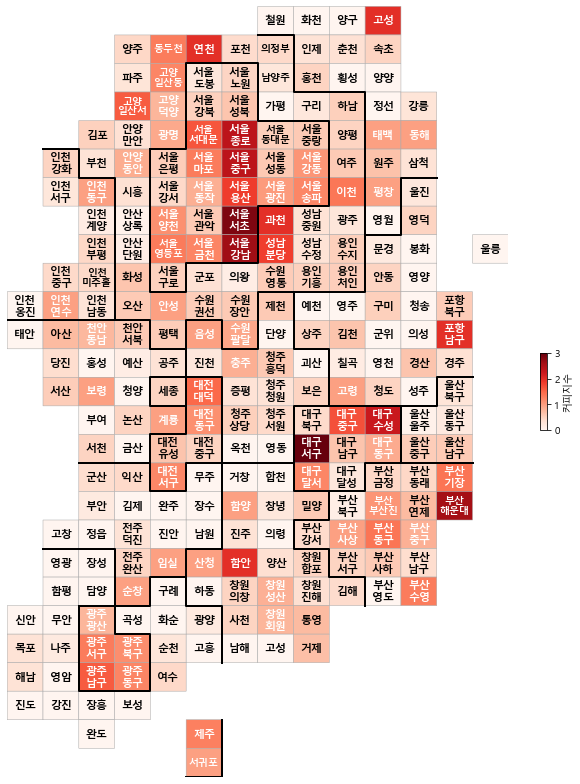

In [20]:
import cartogram.drawKorea as dk
dk.drawKorea('커피지수', coffee_index, 'Reds')

In [21]:
# 커피지수 Top 10
coffee_index.sort_values(by='커피지수', ascending=False).head(10)

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
116,대구 서구,15,8,1.0,3.0,0.0,0.0,3.000000
154,서울 서초,7,6,21.0,49.0,31.0,7.0,2.857143
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
139,부산 해운대,17,12,11.0,29.0,5.0,2.0,2.615385
163,서울 중구,5,6,23.0,57.0,15.0,7.0,2.400000
162,서울 종로,4,6,15.0,33.0,15.0,5.0,2.400000
117,대구 수성,14,10,9.0,23.0,2.0,2.0,2.272727
88,포항 남구,11,12,4.0,10.0,0.0,1.0,2.000000
43,연천,1,5,1.0,0.0,2.0,0.0,2.000000
79,함안,19,6,1.0,0.0,2.0,0.0,2.000000


### 스타벅스 매장수

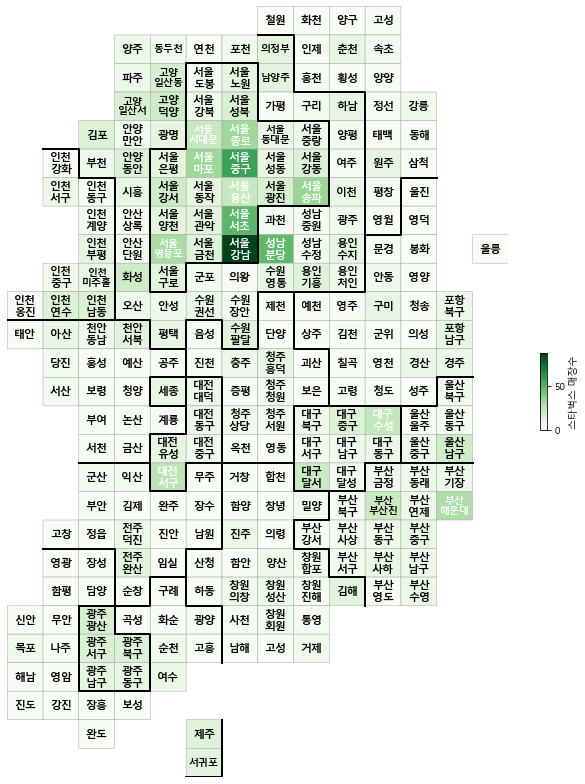

In [22]:
dk.drawKorea('스타벅스 매장수', coffee_index, 'Greens')

In [23]:
# 스타벅스 매장수 Top 5
coffee_index.sort_values(by='스타벅스 매장수', ascending=False).head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
163,서울 중구,5,6,23.0,57.0,15.0,7.0,2.400000
154,서울 서초,7,6,21.0,49.0,31.0,7.0,2.857143
34,성남 분당,8,7,23.0,48.0,17.0,12.0,1.857143
157,서울 송파,6,8,28.0,34.0,13.0,10.0,1.236842


### 커피빈 매장수

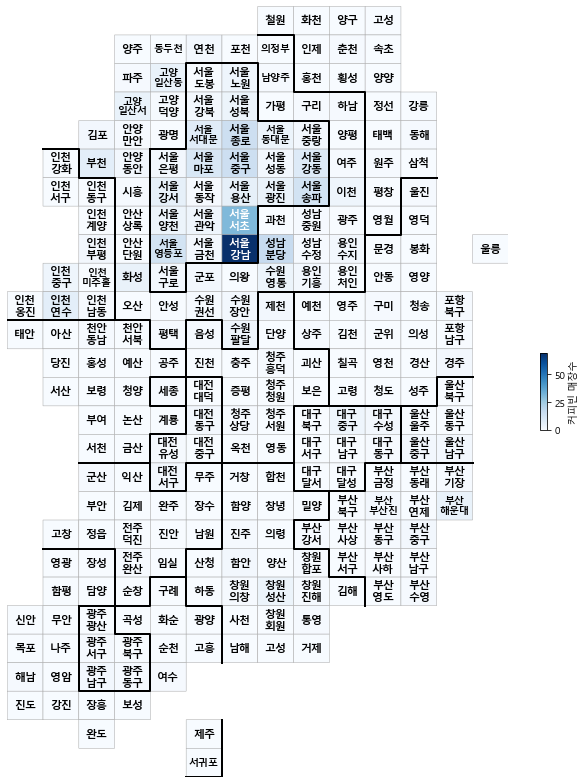

In [24]:
dk.drawKorea('커피빈 매장수', coffee_index, 'Blues')

In [25]:
# 커피빈 매장수 Top 5
coffee_index.sort_values(by='커피빈 매장수', ascending=False).head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
154,서울 서초,7,6,21.0,49.0,31.0,7.0,2.857143
34,성남 분당,8,7,23.0,48.0,17.0,12.0,1.857143
163,서울 중구,5,6,23.0,57.0,15.0,7.0,2.400000
162,서울 종로,4,6,15.0,33.0,15.0,5.0,2.400000


### 이디야 매장수

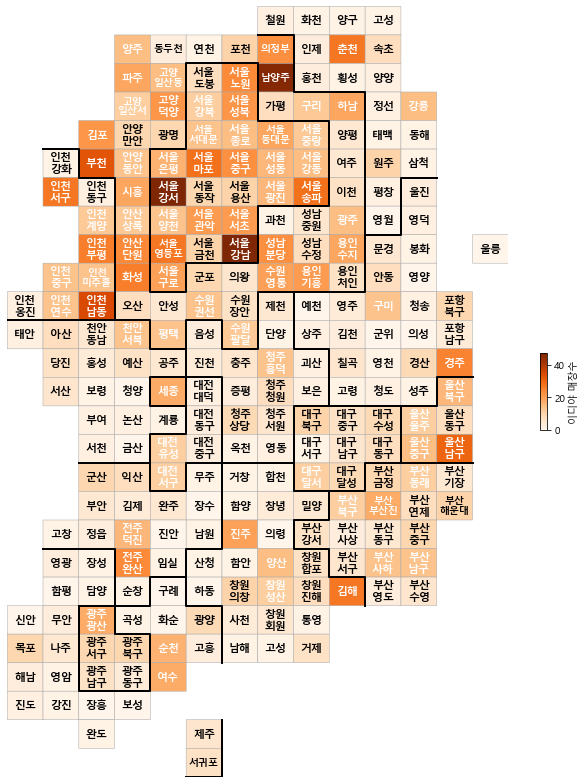

In [26]:
dk.drawKorea('이디야 매장수', coffee_index, 'Oranges')

In [27]:
# 이디야 매장수 Top 5
coffee_index.sort_values(by='이디야 매장수', ascending=False).head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
143,서울 강서,6,4,47.0,19.0,6.0,8.0,0.454545
27,남양주,2,7,46.0,12.0,1.0,3.0,0.265306
173,인천 남동,10,2,35.0,14.0,1.0,13.0,0.312500
33,부천,5,2,33.0,7.0,7.0,9.0,0.333333


### 빽다방 매장수

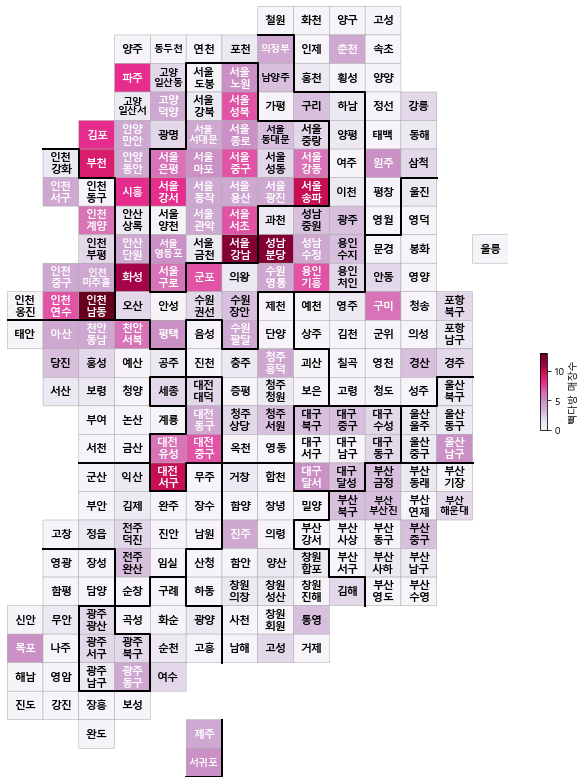

In [28]:
dk.drawKorea('빽다방 매장수', coffee_index, 'PuRd')

In [29]:
# 빽다방 매장수 Top 5
coffee_index.sort_values(by='빽다방 매장수', ascending=False).head()

,ID,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
173,인천 남동,10,2,35.0,14.0,1.0,13.0,0.312500
140,서울 강남,8,6,47.0,87.0,69.0,12.0,2.644068
34,성남 분당,8,7,23.0,48.0,17.0,12.0,1.857143
59,화성,9,3,26.0,19.0,5.0,11.0,0.648649
121,대전 서구,16,4,12.0,25.0,2.0,10.0,1.227273


## 지도 위에 표시하기

In [30]:
import folium
import json

In [31]:
coffee_index_folium = coffee_index.set_index('ID')
coffee_index_folium.head()

,y,x,이디야 매장수,스타벅스 매장수,커피빈 매장수,빽다방 매장수,커피지수
ID,,,,,,,
강릉,3,11,15.0,5.0,0.0,2.0,0.294118
고성(강원),0,10,1.0,2.0,0.0,0.0,2.000000
동해,4,11,1.0,1.0,1.0,1.0,1.000000
삼척,5,11,1.0,1.0,0.0,2.0,0.333333
속초,1,10,8.0,4.0,0.0,0.0,0.500000


In [32]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf8'))
#전국지도
map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = coffee_index_folium['커피지수'],
               columns = [coffee_index_folium.index, coffee_index_folium['커피지수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>커피지수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [33]:
#전국지도
map = folium.Map(location=[35.9902, 127.054], zoom_start=7)
folium.Choropleth(geo_data = geo_data,
               data = coffee_index_folium['스타벅스 매장수'],
               columns = [coffee_index_folium.index, coffee_index_folium['스타벅스 매장수']],
               fill_color = 'Greens',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>스타벅스 매장수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map